In [1]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import pyproj
from tqdm import tqdm
import numpy as np

In [8]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import xml.etree.ElementTree as ET

In [4]:
# check python version and all packages version
def check_python_version():
    import sys
    print("Python version")
    print (sys.version)
    print("Pandas version")
    print(pd.__version__)
    print("Geopandas version")
    print(gpd.__version__)
    print("Xarray version")
    print(xr.__version__)
    print("Pyproj version")
    print(pyproj.__version__)

check_python_version()

Python version
3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Pandas version
2.2.2
Geopandas version
0.14.2
Xarray version
2023.6.0
Pyproj version
3.6.1


In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
files = os.listdir('../Weather_Data/')
files

['dead_fuel_moisture_1000hr.2001.2023.CA.nc',
 'dead_fuel_moisture_100hr.2001.2023.CA.nc',
 'expanded_Palmer_Drought_Severity_Index.2001.2023.CA.nc',
 'max_air_temperature.2001.2023.CA-008.nc',
 'max_relative_humidity.2001.2023.CA.nc',
 'min_air_temperature.2001.2023.CA-009.nc',
 'min_relative_humidity.2001.2023.CA.nc',
 'Palmer_Drought_Severity_Index.2001.2023.CA.nc',
 'precipitation_amount.2001.2023.CA.nc',
 'specific_humidity.2001.2023.CA.nc',
 'surface_downwelling_shortwave_flux.2001.2023.CA.nc',
 'wind_from_direction.2001.2023.CA.nc',
 'wind_speed.2001.2023.CA.nc']

In [7]:
data_dir = '../Weather_Data/'
wind_dat = xr.open_dataset(os.path.join(data_dir, files[-1]))

In [9]:
print(f"File: {files[-1]}")
print(f"Dimensions: {wind_dat.dims}")
print(f"Coordinates: {wind_dat.coords}")
print(f"Data variables: {wind_dat.data_vars}")

File: wind_speed.2001.2023.CA.nc
Dimensions: Frozen({'day': 8400, 'lon': 259, 'lat': 240})
Coordinates: Coordinates:
  * day      (day) datetime64[ns] 2001-01-01 2001-01-02 ... 2023-12-31
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -114.1 -114.1 -114.0
  * lat      (lat) float64 41.98 41.94 41.9 41.86 ... 32.15 32.11 32.07 32.03
Data variables: Data variables:
    wind_speed  (day, lat, lon) float32 ...


In [10]:
wind_dat.head()

<xarray.Dataset>
Dimensions:     (day: 5, lon: 5, lat: 5)
Coordinates:
  * day         (day) datetime64[ns] 2001-01-01 2001-01-02 ... 2001-01-05
  * lon         (lon) float64 -124.8 -124.7 -124.7 -124.6 -124.6
  * lat         (lat) float64 41.98 41.94 41.9 41.86 41.82
Data variables:
    wind_speed  (day, lat, lon) float32 ...
Attributes: (12/22)
    CDI:                        Climate Data Interface version 2.1.1 (https:/...
    Conventions:                CF-1.6
    geospatial_bounds_crs:      EPSG:4326
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    ...                         ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...
    history:                    Fri Nov 29 18:50:37 2024: cdo setmissval,nan ...
    CDO:                        Climate Data Operators version 2.1.1 (https:/...

In [20]:
selected_data = wind_dat.sel(day=slice('2023-09-29', '2023-10-07'), lon=wind_dat.lon.values[100], lat=wind_dat.lat.values[100])['wind_speed']

# Convert the selected data to a pandas DataFrame
selected_data.to_dataframe().reset_index()

,day,lon,lat,wind_speed
0,2023-09-29,-120.6,37.816667,4.2
1,2023-09-30,-120.6,37.816667,2.6
2,2023-10-01,-120.6,37.816667,2.6
3,2023-10-02,-120.6,37.816667,3.2
4,2023-10-03,-120.6,37.816667,2.9
5,2023-10-04,-120.6,37.816667,1.3
6,2023-10-05,-120.6,37.816667,2.4
7,2023-10-06,-120.6,37.816667,2.3
8,2023-10-07,-120.6,37.816667,1.8


In [13]:
# Apply the rolling window and calculate the maximum wind speed
max_wind_speed = wind_dat['wind_speed'].rolling(day=5, center=False).max()

# Create a new xarray dataset with the calculated values
max_wind_dat = xr.Dataset({
    'max_wind_speed': max_wind_speed
})

In [14]:
print(f"Dimensions: {max_wind_dat.dims}")
print(f"Coordinates: {max_wind_dat.coords}")
print(f"Data variables: {max_wind_dat.data_vars}")

Dimensions: Frozen({'day': 8400, 'lon': 259, 'lat': 240})
Coordinates: Coordinates:
  * day      (day) datetime64[ns] 2001-01-01 2001-01-02 ... 2023-12-31
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -114.1 -114.1 -114.0
  * lat      (lat) float64 41.98 41.94 41.9 41.86 ... 32.15 32.11 32.07 32.03
Data variables: Data variables:
    max_wind_speed  (day, lat, lon) float32 nan nan nan nan ... nan nan nan nan


In [21]:
selected_data = max_wind_dat.sel(day=slice('2023-10-03', '2023-10-07'), lon=wind_dat.lon.values[100], lat=wind_dat.lat.values[100])['max_wind_speed']

# Convert the selected data to a pandas DataFrame
selected_data.to_dataframe().reset_index()

,day,lon,lat,max_wind_speed
0,2023-10-03,-120.6,37.816667,4.2
1,2023-10-04,-120.6,37.816667,3.2
2,2023-10-05,-120.6,37.816667,3.2
3,2023-10-06,-120.6,37.816667,3.2
4,2023-10-07,-120.6,37.816667,2.9


Confirmed! max wind calculation is okay!

In [23]:
max_wind_dat.to_netcdf(os.path.join(data_dir, 'max_' + files[-1]))

In [112]:
# # Initialize a list to store the max wind speeds
# max_wind_speeds = []

# # Iterate over each fire event
# for index, row in tqdm(gdf_wgs84.iterrows(), total=gdf_wgs84.shape[0], desc="Processing fire events"):
#     # Extract the centroid coordinates
#     centroid = row['centroid']
#     lon, lat = centroid.x, centroid.y
    
#     # Define the date range
#     alarm_date = pd.to_datetime(row['ALARM_DATE'])
#     # cont_date = pd.to_datetime(row['CONT_DATE'])
#     start_date = alarm_date - pd.Timedelta(days=4)
#     end_date = alarm_date
    
#     # Extract the wind speed data for the specified date range and nearest location
#     date_range_data = wind_dat.sel(day=slice(start_date, end_date))
#     wind_speed_data = date_range_data.sel(lon=lon, lat=lat, method='nearest')['wind_speed']
    
#     if wind_speed_data.size == 0:
#         max_wind_speed = np.nan  # or some other placeholder value
#     else:
#         # Calculate the maximum wind speed
#         max_wind_speed = wind_speed_data.max().item()
    
#     # Append the max wind speed to the list
#     max_wind_speeds.append(max_wind_speed)

Processing fire events: 100%|██████████| 7636/7636 [00:18<00:00, 413.97it/s]


In [113]:
# Add the max wind speeds to a new column in gdf_wgs84
# gdf_wgs84['max_wind_speed'] = max_wind_speeds

In [114]:
# print 1662th rows in gdf_wgs84, onlyALARM_DATE, CONT_DATE, centroid, max_wind_speed
# gdf_wgs84[['YEAR_','STATE','ALARM_DATE', 'CONT_DATE','FIRE_NAME', 'centroid','max_wind_speed']].head(5)

,YEAR_,STATE,ALARM_DATE,CONT_DATE,FIRE_NAME,centroid,max_wind_speed
0,2023,CA,2023-06-17,2023-06-17,WHITWORTH,POINT (-122.9120847355907 41.53217213005621),4.0
1,2023,CA,2023-06-02,2023-06-02,KAISER,POINT (-121.9628407086748 39.83074073580132),3.4
2,2023,CA,2023-07-01,2023-07-02,JACKSON,POINT (-120.9046934457534 38.29510097637684),2.6
3,2023,CA,2023-07-11,2023-07-11,CARBON,POINT (-120.984174710167 38.44196772669421),3.8
4,2023,CA,2023-07-11,2023-07-12,LIBERTY,POINT (-120.9959298472349 38.24722487970475),2.9


In [115]:
# check the quatiles of max_wind_speed
# gdf_wgs84['max_wind_speed'].describe()

count    7538.000000
mean        4.312921
std         1.651240
min         1.300000
25%         3.200000
50%         3.900000
75%         5.000000
max        16.900000
Name: max_wind_speed, dtype: float64

In [116]:
# classfy the fire into wind driven and non-wind driven by max_wind_speed > 3
# gdf_wgs84['wind_driven'] = gdf_wgs84['max_wind_speed'] > 6
# check the number of wind driven and non-wind driven fire
# gdf_wgs84['wind_driven'].value_counts()

wind_driven
False    6662
True      974
Name: count, dtype: int64

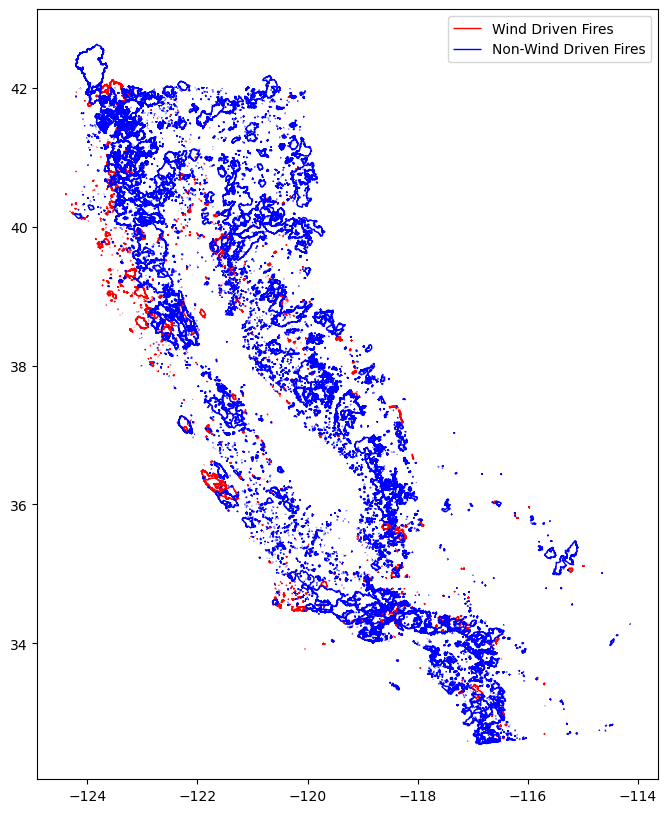

In [117]:
# plot the wind driven and non-wind driven fire boundaries
# fig, ax = plt.subplots(figsize=(10, 10))
# gdf_wgs84[gdf_wgs84['wind_driven']].boundary.plot(ax=ax, linewidth=1, color='red', label='Wind Driven Fires')
# gdf_wgs84[~gdf_wgs84['wind_driven']].boundary.plot(ax=ax, linewidth=1, color='blue', label='Non-Wind Driven Fires')
# plt.legend()
# plt.show()

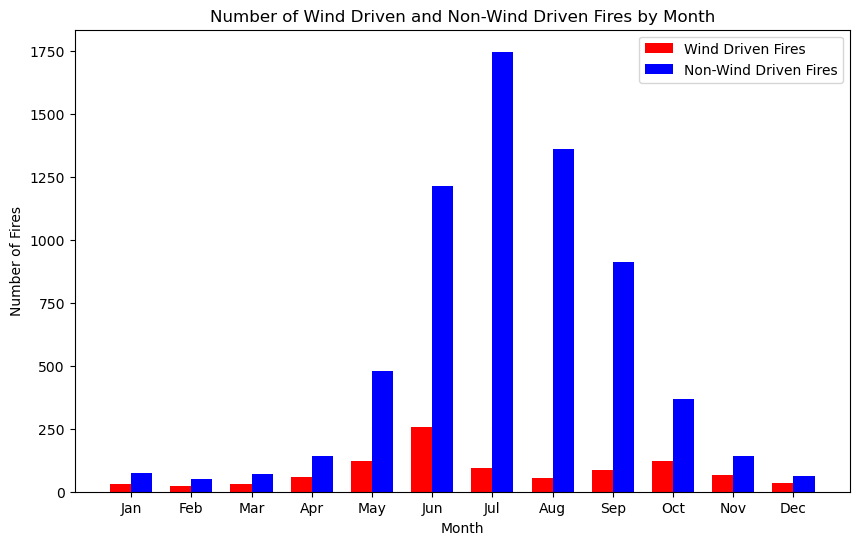

In [118]:
# plot the bar chart of wind driven and non-wind driven fire by MONTH from alarm_date
# gdf_wgs84['MONTH'] = pd.to_datetime(gdf_wgs84['ALARM_DATE']).dt.month
# wind_driven_counts = gdf_wgs84[gdf_wgs84['wind_driven']].groupby('MONTH').size()
# non_wind_driven_counts = gdf_wgs84[~gdf_wgs84['wind_driven']].groupby('MONTH').size()

# fig, ax = plt.subplots(figsize=(10, 6))
# width = 0.35
# x = np.arange(1, 13)
# ax.bar(x - width/2, wind_driven_counts, width, label='Wind Driven Fires', color='red')
# ax.bar(x + width/2, non_wind_driven_counts, width, label='Non-Wind Driven Fires', color='blue')
# ax.set_xlabel('Month')
# ax.set_ylabel('Number of Fires')
# ax.set_title('Number of Wind Driven and Non-Wind Driven Fires by Month')
# ax.set_xticks(x)
# ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# ax.legend()
# plt.show()